# Predict whether a bank customer will churn or stay using demographic and account data by building an Artificial Neural Network (ANN) classification model.

In [1]:
import pandas as pd
import tensorflow.keras as k

C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
data = pd.read_csv('Dataset/Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Check Outliers

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

def checkOutliers(data, col):
    plt.figure(figsize=(12,4))
    
    # Boxplot
    plt.subplot(1,2,1)
    plt.boxplot(data[col])
    plt.title(f"Boxplot of {col}")
    
    # Histogram 
    plt.subplot(1,2,2)
    sns.histplot(data=data, x=col, kde=True)
    
    mean = data[col].mean()
    std = data[col].std()
    
    plt.axvline(mean + 3*std, color='red')
    plt.axvline(mean - 3*std, color='red')
    
    plt.tight_layout()
    plt.show()

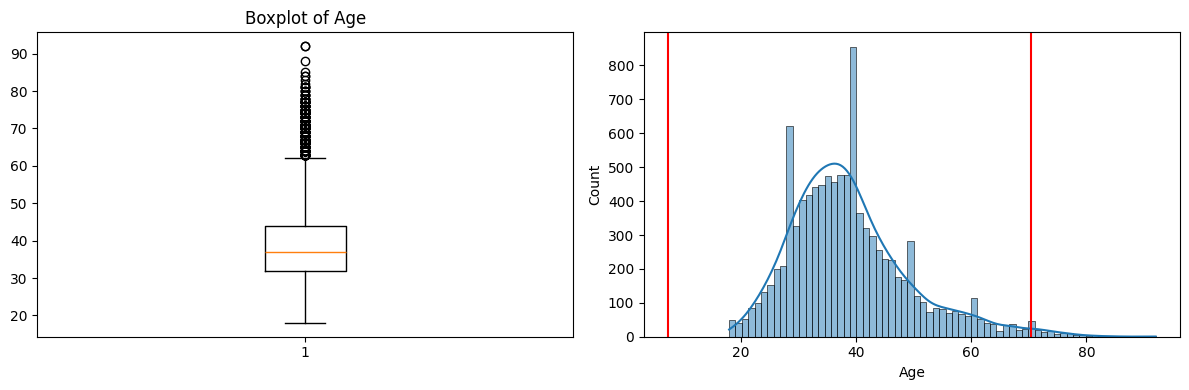

In [6]:
checkOutliers(data, 'Age')

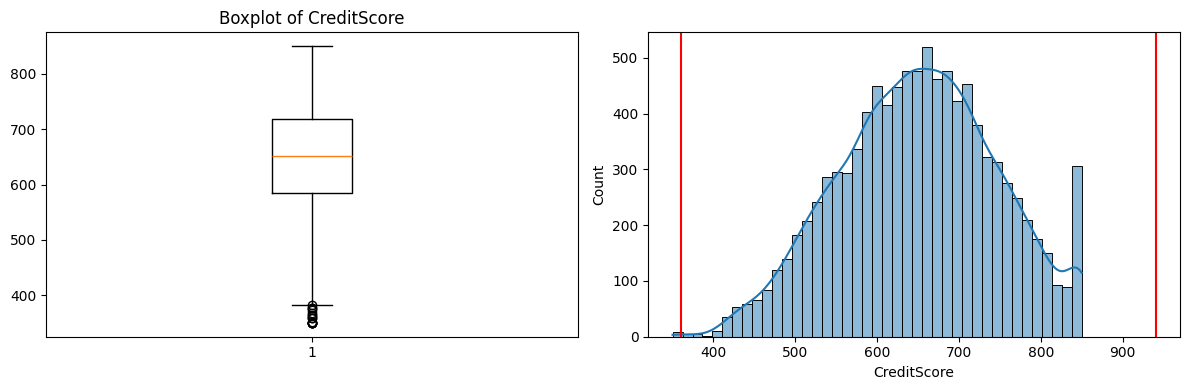

In [7]:
checkOutliers(data, 'CreditScore')

# Handle Outliers

In [8]:
def handleOuteliers(data, col):
    Q3 = data[col].quantile(0.75)
    Q1 = data[col].quantile(0.25)
    
    IQR = Q3 - Q1
    
    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    
    data.loc[data[col] > upper, col] = upper
    data.loc[data[col] < lower, col] = lower

In [9]:
handleOuteliers(data, 'Age')
handleOuteliers(data, 'CreditScore')

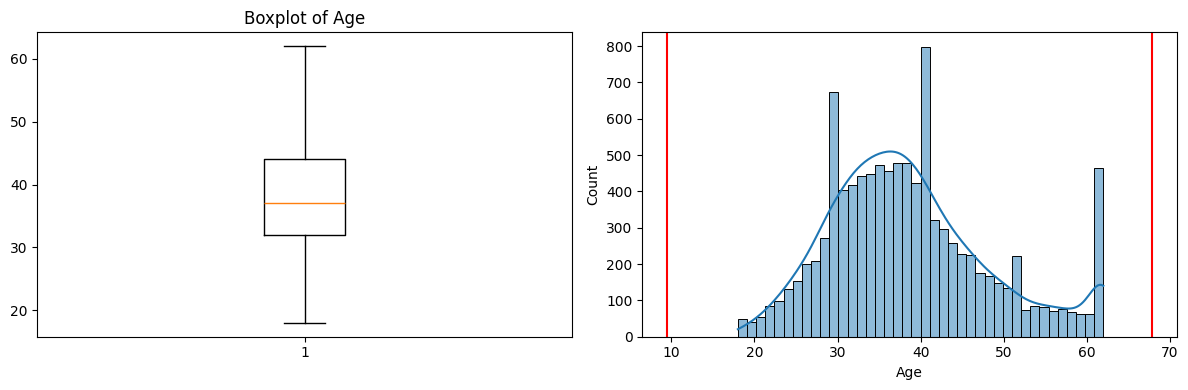

In [10]:
checkOutliers(data, 'Age')

In [11]:
data.drop(['RowNumber',	'CustomerId', 'Surname'], inplace=True, axis=1)

# Encoding

In [12]:
data['Geography'] = data['Geography'].replace({'France' : 0, 'Spain' : 1, 'Germany' : 2})
data['Gender'] = data['Gender'].replace({'Female' : 0, 'Male' : 1})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_200\3035558980.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Geography'] = data['Geography'].replace({'France' : 0, 'Spain' : 1, 'Germany' : 2})
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_200\3035558980.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace({'Female' : 0, 'Male' : 1})


In [13]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0


In [14]:
# 

In [15]:
X = data.drop('Exited', axis=1)
y = data['Exited']

# Check Balance Data

In [16]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [17]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X, y = sm.fit_resample(X, y)

In [18]:
X.shape

(15926, 10)

In [19]:
y.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [20]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0


In [21]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
model = k.models.Sequential()
model.add(k.layers.Dense(units=10, activation='relu'))
model.add(k.layers.Dense(units=32, activation='relu'))
model.add(k.layers.Dense(units=1, activation='sigmoid'))

In [24]:
model.compile(loss=k.losses.BinaryCrossentropy(), metrics=['accuracy'],
             optimizer='adam')

In [25]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7249 - loss: 0.5466
Epoch 2/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7781 - loss: 0.4640
Epoch 3/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7898 - loss: 0.4455
Epoch 4/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8029 - loss: 0.4286
Epoch 5/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8080 - loss: 0.4153
Epoch 6/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8132 - loss: 0.4060
Epoch 7/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8150 - loss: 0.4011
Epoch 8/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8153 - loss: 0.3984
Epoch 9/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8186 - loss: 0.3956
Epoch 10/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8180 - loss: 0.3940


In [26]:
model.evaluate(X_test, y_test)

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8129 - loss: 0.4017


[0.4016866981983185, 0.8128924369812012]

In [27]:
test_predict = model.predict(X_test)

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [28]:
# Do using accuracy score you can do it also using evaluate 

In [29]:
label = []
for value in test_predict:
    if(value >= 0.5):
        label.append(1)
    else:
        label.append(0)

        

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, label)

0.8128924236082042

In [32]:
print("\nEnter Customer Details:\n")

CreditScore = int(input("Credit Score: "))
Geography = input("Geography (France/Spain/Germany): ")
Gender = input("Gender (Male/Female): ")
Age = int(input("Age: "))
Tenure = int(input("Tenure: "))
Balance = float(input("Balance: "))
NumOfProducts = int(input("Num Of Products: "))
HasCrCard = int(input("Has Credit Card (1/0): "))
IsActiveMember = int(input("Is Active Member (1/0): "))
EstimatedSalary = float(input("Estimated Salary: "))

# ===== SAME ENCODING AS TRAINING =====
geo_map = {"France":0, "Spain":1, "Germany":2}
gender_map = {"Female":0, "Male":1}

Geography = geo_map[Geography]
Gender = gender_map[Gender]

# ===== CREATE INPUT ARRAY (same feature order) =====
user_data = [[CreditScore, Geography, Gender, Age, Tenure,
              Balance, NumOfProducts, HasCrCard,
              IsActiveMember, EstimatedSalary]]

# ===== SCALE USING TRAINED SCALER =====
user_data = ss.transform(user_data)

# ===== PREDICT =====
pred = model.predict(user_data)

if pred[0][0] > 0.5:
    print("\n❌ Customer likely to CHURN")
else:
    print("\n✅ Customer likely to STAY")



Enter Customer Details:



Credit Score:  7
Geography (France/Spain/Germany):  France
Gender (Male/Female):  Female
Age:  45
Tenure:  5
Balance:  45000
Num Of Products:  3
Has Credit Card (1/0):  4
Is Active Member (1/0):  4
Estimated Salary:  450000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step

C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step

✅ Customer likely to STAY
